In [ ]:
from google.colab import drive
drive.mount("/content/iris_flower_classification")

Drive already mounted at /content/iris_flower_classification; to attempt to forcibly remount, call drive.mount("/content/iris_flower_classification", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error

In [ ]:
iris_data=pd.read_csv("/content/iris_flower_classification/MyDrive/Share IRIS.csv")
(iris_data)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

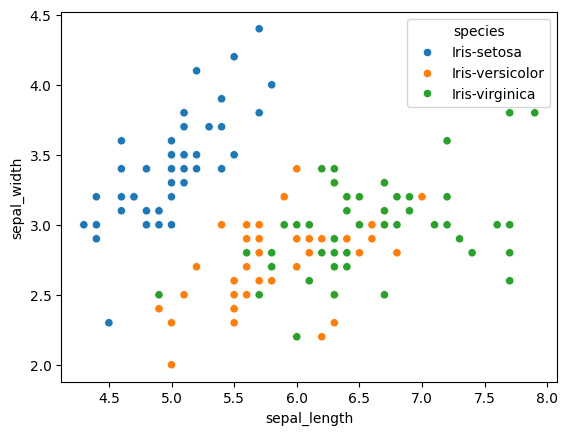

In [ ]:
sns.scatterplot(data=iris_data,x="sepal_length",y="sepal_width",hue="species")

Text(0.5, 1.0, 'species sepal length against sepal height ')

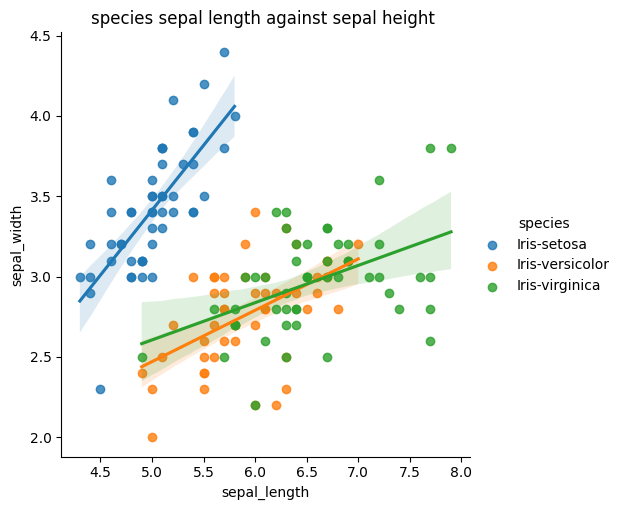

In [ ]:
sns.lmplot(data=iris_data,x="sepal_length",y="sepal_width",hue="species")
plt.title("species sepal length against sepal height ")

Text(0.5, 1.0, 'species petal length against petal height ')

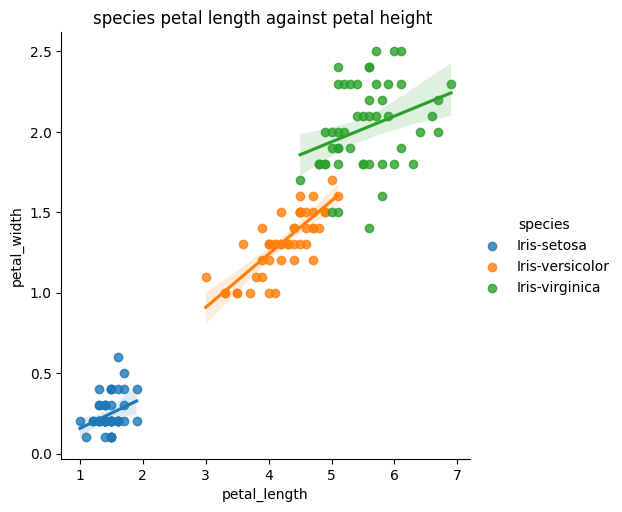

In [ ]:
sns.lmplot(data=iris_data,x="petal_length",y="petal_width",hue="species")
plt.title("species petal length against petal height ")

In [ ]:
iris_data.species

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [ ]:
print(iris_data['species'].unique())
iris_data['species'] = iris_data['species'].str.strip()
iris_data['species'] = iris_data['species'].map({"Iris-setosa": 1, "Iris-versicolor": 2, "Iris-virginica": 3})
print(iris_data['species'])
print(iris_data['species'])

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 150, dtype: int64
0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 150, dtype: int64


In [ ]:
iris_data.isnull()
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [ ]:
iris_data.species.value_counts()

species
1    50
2    50
3    50
Name: count, dtype: int64

<Axes: xlabel='species'>

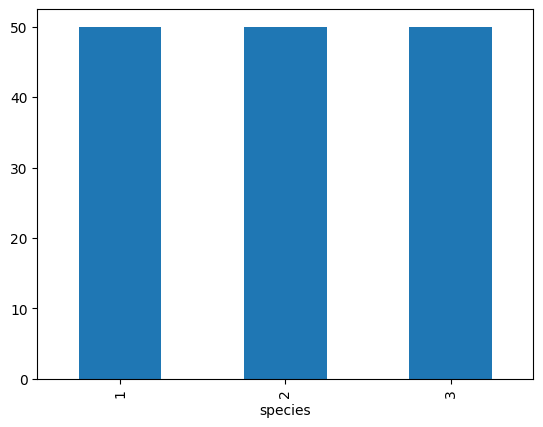

In [ ]:
iris_data.species.value_counts().plot(kind="bar")

<Axes: xlabel='species'>

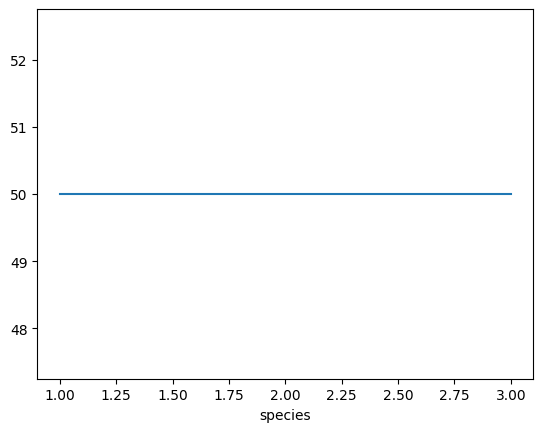

In [ ]:
iris_data.species.value_counts().plot(kind="line")

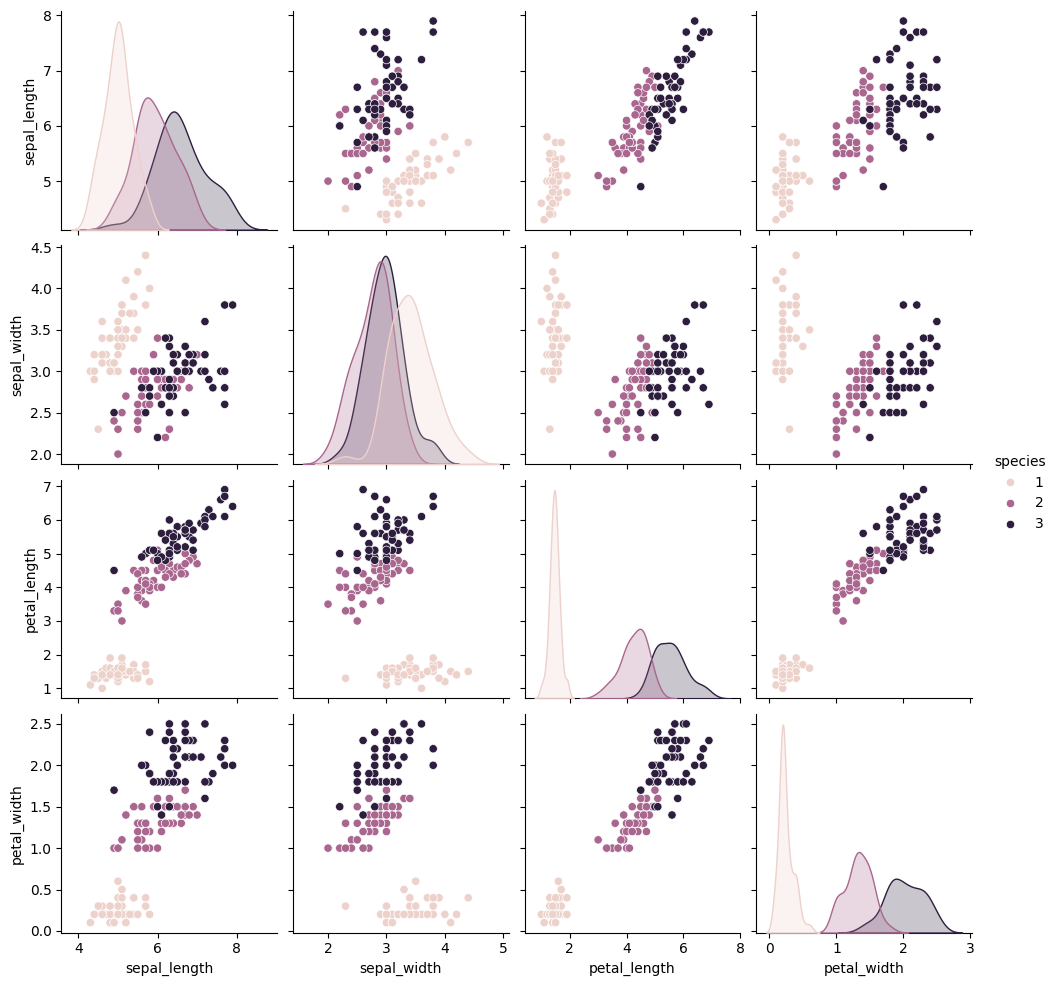

In [ ]:
import seaborn as sns
sns.pairplot(iris_data,hue="species")

In [ ]:

# Features and target
X = iris_data.drop(columns='species')
y = iris_data['species']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,test_size=0.2, random_state=42)

# Initialize the classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Train the classifier
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Mean Absolute Error: 0.0


In [ ]:
y_pred

array([2, 1, 3, 2, 2, 1, 2, 3, 2, 2, 3, 1, 1, 1, 1, 2, 3, 2, 2, 3, 1, 3,
       1, 3, 3, 3, 3, 3, 1, 1])

In [ ]:
print("species")
y

species


0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: species, Length: 150, dtype: int64

In [ ]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y_test

73     2
18     1
118    3
78     2
76     2
31     1
64     2
141    3
68     2
82     2
110    3
12     1
36     1
9      1
19     1
56     2
104    3
69     2
55     2
132    3
29     1
127    3
26     1
128    3
131    3
145    3
108    3
143    3
45     1
30     1
Name: species, dtype: int64

In [ ]:
from sklearn.svm import SVC
model =SVC()
model.fit(X_train,y_train)
model.score(X_test,y_test)
preds2=model.predict([[6,3,5,2]])
print(preds2)

[3]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
